In [1]:
import pandas as pd
import numpy as np

import os
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import keras
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks

from keras.preprocessing import text, sequence

from keras.layers import Dense,Input,LSTM,Bidirectional,Activation,Conv1D,GRU
from keras.layers import Dropout,Embedding,GlobalMaxPooling1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D

from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import Callback

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

print(keras.__version__)

2.4.3


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Load dataset
def load_data():
    data =pd.read_csv("/content/drive/MyDrive/Covid 19 News Classification/Data/raw_data_v2.csv", engine='python')
    return data

In [4]:
tweet_df = load_data()
tweet_df.head(2)

,Unnamed: 0,Sno,Headline,Covid,Sentiment,Covid_punct,clean_covid,clean_covid_v2,clean_covid_v3,clean_covid_v4,clean_covid_v5,clean_covid_v6,covid_token,covid_token_filtered,covid_stemmed,covid_lemmatized
0,0,0,"Coronavirus cases reach 2,438 in Rajasthan; 81...",1,0,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,Coronavirus cases reach in Rajasthan patient...,coronavirus cases reach in rajasthan patient...,coronavirus cases reach in rajasthan patient...,coronavirus cases reach in rajasthan patient...,"['coronavirus', 'cases', 'reach', 'in', 'rajas...","['coronavirus', 'cases', 'reach', 'rajasthan',...",coronaviru case reach rajasthan patient recov,coronavirus case reach rajasthan patient recover
1,1,1,"Coronavirus cases in Delhi surge to 3,439 afte...",1,0,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,Coronavirus cases in Delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,coronavirus cases in delhi surge to after ne...,"['coronavirus', 'cases', 'in', 'delhi', 'surge...","['coronavirus', 'cases', 'delhi', 'surge', 'ne...",coronaviru case delhi surg new case report today,coronavirus case delhi surge new case reported...


In [36]:
tweet_df['covid_lemmatized'] = tweet_df['covid_lemmatized'].str.lower()

In [6]:
from imblearn.over_sampling import SMOTE
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [87]:
X = tweet_df['covid_lemmatized']
y = tweet_df['Covid']

In [88]:
X.shape,y.shape

((4072,), (4072,))

In [90]:
tweet_df.Covid.value_counts()

1    3245
0     827
Name: Covid, dtype: int64

In [91]:
max_features=30000
max_len=56
sequence_input = Input(shape=(max_len, ))
embed_size=100

In [92]:
tokenizer = text.Tokenizer(num_words = max_features,lower = True
)

tokenizer.fit_on_texts(X)
X=tokenizer.texts_to_sequences(X)
X=sequence.pad_sequences(X,maxlen=max_len)

In [93]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=1, n=3245 (50.000%)
Class=0, n=3245 (50.000%)


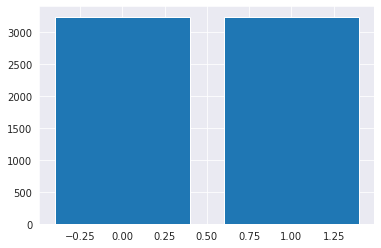

In [94]:
from matplotlib import pyplot
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [96]:
# Bi LSTM Implimentation
from tensorflow.keras.layers import Embedding,SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from keras.layers.convolutional import Conv1D  
from keras.optimizers import SGD
from keras.optimizers import Adam
from tensorflow.keras import optimizers

from keras.models import Sequential
from keras.layers import Embedding,Bidirectional, Dense,Dropout
from keras.layers import Dense, Activation, Flatten
from keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
from keras.regularizers import l2

from keras. callbacks import TensorBoard

In [108]:
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional, Dense,Dropout
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cvscores = []

for train, test in kfold.split(X,y):
    model2=Sequential()
    model2.add(Embedding(max_features,100,trainable=True ))
    model2.add(SpatialDropout1D(0.4))
    model2.add(Bidirectional(LSTM(128)))
    model2.add(Dropout(0.4))
    model2.add(Dense(2,activation='softmax'))
    # model2.add(Dense(1,activation='relu'))
    adam = optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model2.compile(loss='sparse_categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
    # Fit the model
    history = model2.fit(X[train], y[train],validation_data=(X_test, y_test),epochs=5,batch_size=64)

Epoch 1/5
82/82 [==============================] - 21s 256ms/step - loss: 0.4242 - accuracy: 0.7983 - val_loss: 0.1989 - val_accuracy: 0.9206
Epoch 2/5
82/82 [==============================] - 20s 244ms/step - loss: 0.1850 - accuracy: 0.9272 - val_loss: 0.1172 - val_accuracy: 0.9607
Epoch 3/5
82/82 [==============================] - 20s 245ms/step - loss: 0.0729 - accuracy: 0.9755 - val_loss: 0.1844 - val_accuracy: 0.9407
Epoch 4/5
82/82 [==============================] - 20s 244ms/step - loss: 0.0293 - accuracy: 0.9902 - val_loss: 0.1320 - val_accuracy: 0.9669
Epoch 5/5
82/82 [==============================] - 20s 245ms/step - loss: 0.0139 - accuracy: 0.9965 - val_loss: 0.1365 - val_accuracy: 0.9669
Epoch 1/5
82/82 [==============================] - 21s 252ms/step - loss: 0.4597 - accuracy: 0.7878 - val_loss: 0.1899 - val_accuracy: 0.9253
Epoch 2/5
82/82 [==============================] - 20s 245ms/step - loss: 0.1691 - accuracy: 0.9357 - val_loss: 0.1113 - val_accuracy: 0.9592
Epoch 

In [110]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.441391,0.793914,0.176029,0.932974
1,0.164592,0.938945,0.091880,0.976117
2,0.065586,0.978428,0.074060,0.976888
3,0.026471,0.991525,0.082695,0.976888
4,0.008326,0.997689,0.096560,0.979969


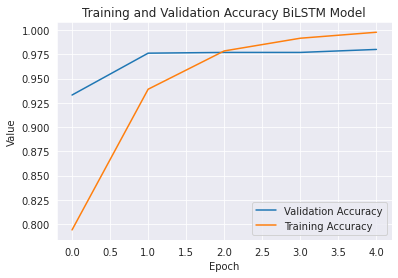

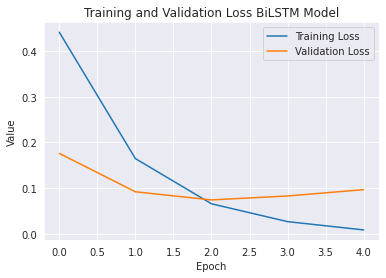

In [111]:
import matplotlib.pyplot as plt

plt.clf()
plt.plot(hist_df['val_accuracy'], label='Validation Accuracy')
plt.plot(hist_df['accuracy'], label='Training Accuracy')
#plt.axvline(x = 4, linewidth=1, color='r', linestyle = "--")

plt.title('Training and Validation Accuracy BiLSTM Model')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()


plt.plot(hist_df['loss'], label='Training Loss')
plt.plot(hist_df['val_loss'], label='Validation Loss')
#plt.axvline(x = 4, linewidth=1, color='r', linestyle = "--")

plt.title('Training and Validation Loss BiLSTM Model')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [112]:
y_pred=model2.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9799691833590138

In [113]:
y_score = model2.predict_proba(X_test)

In [105]:
pip install scikit-plot

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


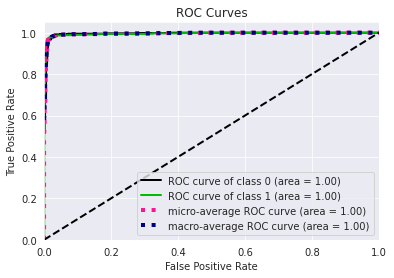

In [114]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test, y_score)
plt.show()

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       621
           1       0.99      0.98      0.98       677

    accuracy                           0.98      1298
   macro avg       0.98      0.98      0.98      1298
weighted avg       0.98      0.98      0.98      1298



In [119]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.980
Confusion matrix, without normalization


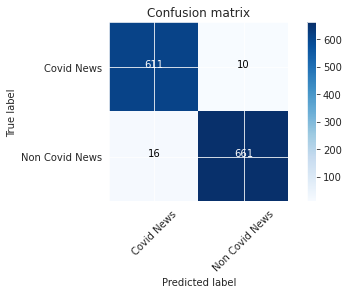

In [121]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
import itertools

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Covid News', 'Non Covid News'])